import necessary libraries for the simulation

In [1]:
# general tools
import numpy as np
from numpy import random

# scanpy for visualization
import anndata as ad
from scanpy.api.tl import diffmap
from scanpy.api import pp

In [2]:
import sys
%load_ext autoreload
%autoreload 2

In [3]:
from prosstt import tree
from prosstt import simulation as sim
from prosstt import sim_utils as sut

set random seed for reproducability

In [4]:
rseed = 92 # '92 was a good year
random.seed(rseed)

simulate a default tree and normalize the expression matrix by library size

In [5]:
t = tree.Tree()
X, pseudotimes, branch, scalings = sim.sample_whole_tree_restricted(t)

# normalize gene expression by library size
X = (X.transpose() / scalings).transpose()

/home/npapado/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


calculate the diffusion map of the normalized expression matrix

In [6]:
data = ad.AnnData(np.log(X+1))
pp.neighbors(data, use_rep='X')
diffmap(adata=data)
dm = data.obsm["X_diffmap"]

plot the diffusion map colored according to the branch assignment and pseudotime of each cell

Text(0.5, 1.0, 'pseudotime')

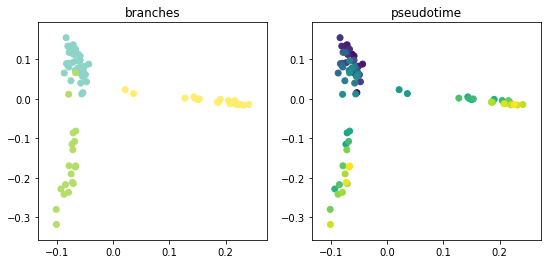

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
# make sure to use viridis as the default color map
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'viridis'

# translate the branch assignment of each cell to a number
br_names, indices = np.unique(branch, return_inverse=True)

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(w=9, h=4)
ax[0].scatter(dm[:, 1], dm[:, 2], c=indices, cmap="Set3")
ax[0].set_title("branches")

# dark blue is the beginning, yellow is the end
ax[1].scatter(dm[:, 1], dm[:, 2], c=pseudotimes, cmap="viridis")
ax[1].set_title("pseudotime")